# [실습] Python을 활용한 AI 모델링 - 머신러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 머신러닝에 대해 실습해 보겠습니다.
+ 머신러닝 모델에는 아래와 같이 모델들이 있습니다.
 + 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
 + 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending

+ 솔직히, 머신러닝이 딥러닝보다 코딩하기 쉽습니다. 4줄 템플릿에 맞쳐 코딩하면 되기 때문입니다.
+ 그래도, 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다. 
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 실습을 위한 KT AIDU 환경변수 설정
2. 머신러닝 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
 - 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending


# 
# 1. 실습을 위한 KT AIDU 환경변수 설정

In [1]:
# 코드실행시 경고 메시지 무시

import warnings
warnings.filterwarnings(action='ignore') 

##### AIDU 라이브러리 임포트

In [2]:
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm

aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)

##### AIDU 디렉토리 환경변수

- data 경로:         aidu_framework.config.data_dir

In [3]:
# aidu_framework.config.data_dir 내용 확인
aidu_framework.config.data_dir

'/aihub/data'

# 
# 2. 머신러닝 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

#### cust_data.csv 파일 컬럼명
+ 고객등급(cust_class), 성별(sex_type), 나이(age), 사용서비스수(efct_svc_count), 서비스중지여부 (dt_stop_yn), 미납여부(npay_yn)
+ 3개월 평균 요금(r3m_avg_bill_amt), A서비스 3개월 평균요금(r3m_A_avg_arpu_amt), B서비스 3개월 평균요금(r3m_B_avg_arpu_amt), 해지여부(termination_yn)

In [5]:
# cust_data.csv 파일 읽기
df = pd.read_csv(aidu_framework.config.data_dir + '/cust_data.csv')

## ③ 데이터 분석

In [6]:
# 12컬럼, 7814 라인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        7814 non-null   object 
 1   sex          7814 non-null   object 
 2   age          7814 non-null   int64  
 3   service      7814 non-null   int64  
 4   stop         7814 non-null   object 
 5   npay         7814 non-null   object 
 6   avg_bill     7814 non-null   float64
 7   A_bill       7814 non-null   float64
 8   B_bill       7814 non-null   float64
 9   termination  7814 non-null   object 
 10  by_age       7814 non-null   int64  
 11  bill_rating  7814 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 732.7+ KB


In [7]:
df.tail()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating
7809,C,M,76,1,N,N,1860.0000,1716.000000,0.0000,N,75,low
7810,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,N,15,low
7811,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,N,10,midhigh
7812,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,Y,40,low
7813,C,F,59,1,N,N,2436.9000,365.535000,1839.9000,N,55,low


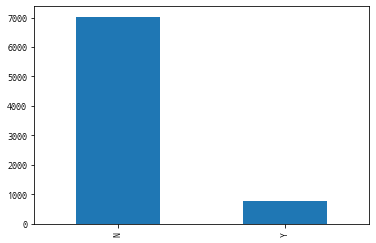

In [8]:
# termination 레이블 불균형 
df['termination'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [9]:
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']

In [10]:
df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first=True)

In [11]:
# 19컬럼, 7814 라인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7814 non-null   int64  
 1   service              7814 non-null   int64  
 2   avg_bill             7814 non-null   float64
 3   A_bill               7814 non-null   float64
 4   B_bill               7814 non-null   float64
 5   by_age               7814 non-null   int64  
 6   class_D              7814 non-null   uint8  
 7   class_E              7814 non-null   uint8  
 8   class_F              7814 non-null   uint8  
 9   class_G              7814 non-null   uint8  
 10  class_H              7814 non-null   uint8  
 11  sex_M                7814 non-null   uint8  
 12  stop_Y               7814 non-null   uint8  
 13  npay_Y               7814 non-null   uint8  
 14  termination_Y        7814 non-null   uint8  
 15  bill_rating_low      7814 non-null   u

## ⑤ Train, Test  데이터셋 분할

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df1.drop('termination_Y', axis=1).values
y = df1['termination_Y'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [15]:
X_train.shape

(5469, 18)

In [16]:
y_train.shape

(5469,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [17]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,age,service,avg_bill,A_bill,B_bill,by_age,class_D,class_E,class_F,class_G,class_H,sex_M,stop_Y,npay_Y,termination_Y,bill_rating_low,bill_rating_lowmid,bill_rating_mid,bill_rating_midhigh
7809,76,1,1860.0000,1716.000000,0.0000,75,0,0,0,0,0,1,0,0,0,1,0,0,0
7810,15,1,1296.0999,194.414985,643.1001,15,0,0,0,0,0,0,0,1,0,1,0,0,0
7811,12,1,13799.6666,2069.949990,10605.9266,10,0,0,0,1,0,1,0,0,0,0,0,0,1
7812,40,0,3140.0000,942.000000,1884.0000,40,0,0,0,0,0,0,0,0,1,1,0,0,0
7813,59,1,2436.9000,365.535000,1839.9000,55,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train[:2], y_train[:2]

(array([[0.38      , 0.33333333, 0.4295439 , 0.06384702, 0.41944434,
         0.4       , 0.        , 0.        , 0.        , 0.        ,
         1.        , 1.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 1.        ],
        [0.58      , 0.11111111, 0.20111297, 0.38498933, 0.        ,
         0.6       , 1.        , 0.        , 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        ]]),
 array([0, 0], dtype=uint8))

+ 모델 입력갯수, 출력갯수 확인

In [21]:
X_train.shape

(5469, 18)

In [22]:
y_train.shape

(5469,)

## ⑦ 모델 개발

#### 모델별 바차트 그려주고 성능 확인을 위한 함수

In [23]:
# 모델별로 Accuracy 점수 저장
# 모델 Accuracy 점수 순서대로 바차트를 그려 모델별로 성능 확인 가능

from sklearn.metrics import accuracy_score

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# 모델명, 예측값, 실제값을 주면 위의 plot_predictions 함수 호출하여 Scatter 그래프 그리며
# 모델별 MSE값을 Bar chart로 그려줌
def accuracy_eval(name_, pred, actual):
    global predictions
    global colors

    plt.figure(figsize=(12, 9))

    acc = accuracy_score(actual, pred)
    my_predictions[name_] = acc * 100

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'accuracy'])
    print(df)
   
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['accuracy'])
    
    for i, v in enumerate(df['accuracy']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('accuracy', fontsize=18)
    plt.xlim(0, 100)
    
    plt.show()

###  
### 1) 로지스틱 회귀 (LogisticRegression, 분류)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [25]:
lg = LogisticRegression(C=1.0,max_iter=2000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [26]:
# 분류기 성능 평가(score)
lg.score(X_test, y_test)

0.929637526652452

- 분류기 성능 평가 지표

In [27]:
lg_pred = lg.predict(X_test)

In [28]:
# 오차행렬
# TN  FP
# FN  TP

confusion_matrix(y_test, lg_pred) 

array([[2098,   11],
       [ 154,   82]])

In [29]:
# 정확도 : 굉장히 높다
accuracy_score(y_test, lg_pred)  

0.929637526652452

In [30]:
# 정밀도
precision_score(y_test, lg_pred) 

0.8817204301075269

In [31]:
# 재현율 : 굉장히 낮다.
recall_score(y_test, lg_pred)  

0.3474576271186441

In [32]:
# 정밀도 + 재현율
f1_score(y_test, lg_pred) 

0.4984802431610942

In [33]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2109
           1       0.88      0.35      0.50       236

    accuracy                           0.93      2345
   macro avg       0.91      0.67      0.73      2345
weighted avg       0.93      0.93      0.92      2345



                model   accuracy
0  LogisticRegression  92.963753


<Figure size 864x648 with 0 Axes>

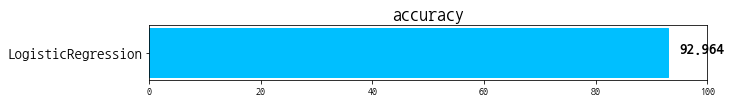

In [34]:
accuracy_eval('LogisticRegression', lg_pred, y_test)

###   
### 2) KNN (K-Nearest Neighbor)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
knn_pred = knn.predict(X_test)

                model   accuracy
0  K-Nearest Neighbor  94.712154
1  LogisticRegression  92.963753


<Figure size 864x648 with 0 Axes>

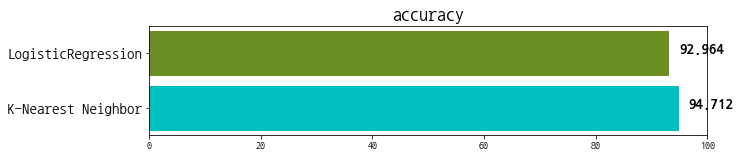

In [38]:
accuracy_eval('K-Nearest Neighbor', knn_pred, y_test)

###  
### 3) 결정트리(DecisionTree)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [41]:
dt_pred = dt.predict(X_test)

                model   accuracy
0        DecisionTree  97.313433
1  K-Nearest Neighbor  94.712154
2  LogisticRegression  92.963753


<Figure size 864x648 with 0 Axes>

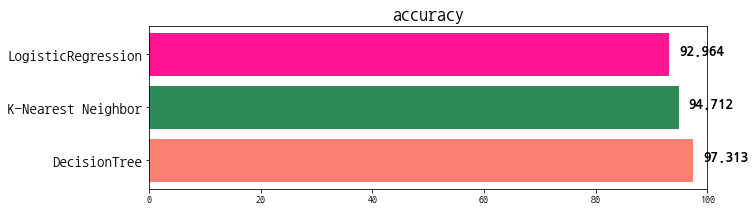

In [42]:
accuracy_eval('DecisionTree', dt_pred, y_test)

### 
### **앙상블 기법의 종류**
- 배깅 (Bagging): 여러개의 DecisionTree 활용하고 샘플 중복 생성을 통해 결과 도출. RandomForest
- 부스팅 (Boosting): 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식. XGBoost, LGBM
- 스태킹 (Stacking): 여러 모델을 기반으로 예측된 결과를 통해 Final 학습기(meta 모델)이 다시 한번 예측

![앙상블](https://teddylee777.github.io/images/2019-12-18/image-20191217144823555.png)

###  
### 4) 랜덤포레스트(RandomForest)
+ Bagging 대표적인 모델로써, 훈련셋트를 무작위로 각기 다른 서브셋으로 데이터셋을 만들고
+ 여러개의 DecisonTree로 학습하고 다수결로 결정하는 모델

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용
- n_estimators: 앙상블하는 트리의 갯수
- max_features: 최대로 사용할 feature의 갯수. 과대적합 방지용
- min_samples_split: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators=3, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [45]:
rfc_pred = rfc.predict(X_test)

                   model   accuracy
0  RandomForest Ensemble  97.611940
1           DecisionTree  97.313433
2     K-Nearest Neighbor  94.712154
3     LogisticRegression  92.963753


<Figure size 864x648 with 0 Axes>

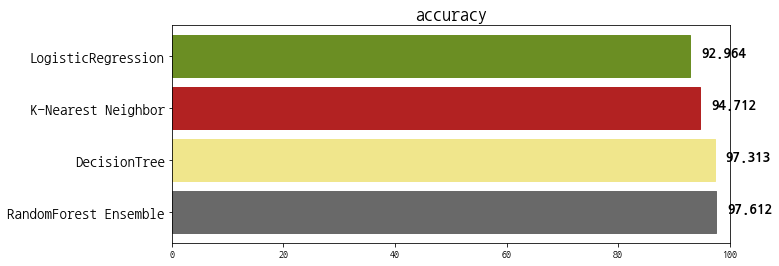

In [46]:
accuracy_eval('RandomForest Ensemble', rfc_pred, y_test)

###  
### 5) XGBoost
+ 여러개의 DecisionTree를 결합하여 Strong Learner 만드는 Boosting 앙상블 기법
+ Kaggle 대회에서 자주 사용하는 모델이다.

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- GBM보다는 빠르고 성능도 향상되었습니다.
- 여전히 학습시간이 매우 느리다

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3. 
- subsample: 샘플 사용 비율. 과대적합 방지용. default=1.0
- max_features: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

In [47]:
!pip install xgboost

Looking in indexes: http://mirror.kakao.com/pypi/simple
     |████████████████████████████████| 166.7 MB 93.5 MB/s eta 0:00:011 MB 19.7 MB/s eta 0:00:09                       | 14.3 MB 19.7 MB/s eta 0:00:08 MB 19.7 MB/s eta 0:00:08 |████▊                           | 24.5 MB 19.7 MB/s eta 0:00:08         | 31.5 MB 19.7 MB/s eta 0:00:07                | 39.0 MB 19.7 MB/s eta 0:00:07                | 42.2 MB 19.7 MB/s eta 0:00:0707    |██████████▎                     | 53.8 MB 19.7 MB/s eta 0:00:06/s eta 0:00:069.7 MB/s eta 0:00:05█████████                 | 77.8 MB 106.1 MB/s eta 0:00:01��█████████████▍              | 90.7 MB 106.1 MB/s eta 0:00:01MB/s eta 0:00:01�███████▉            | 103.3 MB 106.1 MB/s eta 0:00:01��████████████████████           | 109.3 MB 106.1 MB/s eta 0:00:01ta 0:00:01��███████████████▍        | 121.9 MB 106.1 MB/s eta 0:00:01��███████▏     | 136.4 MB 106.1 MB/s eta 0:00:01 MB 106.1 MB/s eta 0:00:01ta 0:00:01�█▉ | 160.8 MB 93.5 MB/s eta 0:00:01
You should consider 

In [48]:
from xgboost import XGBClassifier

In [49]:
xgb = XGBClassifier(n_estimators=3, random_state=42)  # 10초 소요
xgb.fit(X_train, y_train)

[10:21:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3, n_jobs=64, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
xgb_pred = xgb.predict(X_test)

                   model   accuracy
0                XGBoost  97.825160
1  RandomForest Ensemble  97.611940
2           DecisionTree  97.313433
3     K-Nearest Neighbor  94.712154
4     LogisticRegression  92.963753


<Figure size 864x648 with 0 Axes>

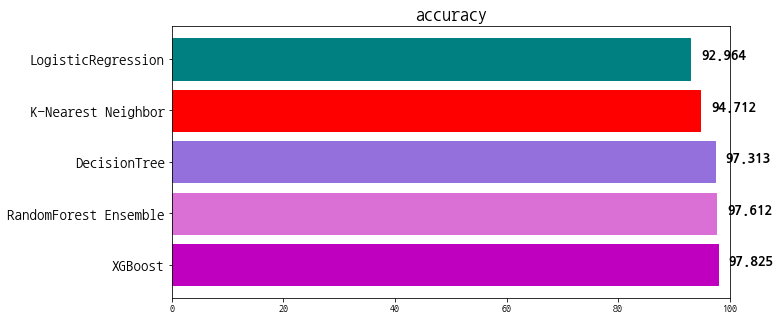

In [51]:
accuracy_eval('XGBoost', xgb_pred, y_test)

###  
### 6) Light GBM
+ XGBoost와 함께 주목받는 DecisionTree 알고리즘 기반의 Boosting 앙상블 기법
+ XGBoost에 비해 학습시간이 짧은 편이다.

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- 속도도 매우 빠릅니다.

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3. 
- colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [52]:
!pip install lightgbm

Looking in indexes: http://mirror.kakao.com/pypi/simple
     |████████████████████████████████| 2.0 MB 21.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [53]:
from lightgbm import LGBMClassifier

In [54]:
lgbm = LGBMClassifier(n_estimators=3, random_state=42)   # 1분 소요
lgbm.fit(X_train, y_train)

LGBMClassifier(n_estimators=3, random_state=42)

In [55]:
lgbm_pred = lgbm.predict(X_test)

                   model   accuracy
0                XGBoost  97.825160
1  RandomForest Ensemble  97.611940
2           DecisionTree  97.313433
3     K-Nearest Neighbor  94.712154
4     LogisticRegression  92.963753
5                   LGBM  89.936034


<Figure size 864x648 with 0 Axes>

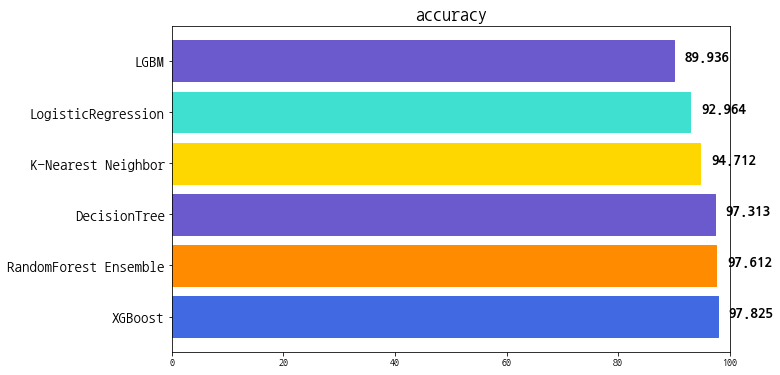

In [56]:
accuracy_eval('LGBM', lgbm_pred, y_test)

### 7) Stacking

개별 모델이 예측한 데이터를 기반으로 **final_estimator** 종합하여 예측을 수행합니다.
- 성능을 극으로 끌어올릴 때 활용하기도 합니다.
- 과대적합을 유발할 수 있습니다. (특히, 데이터셋이 적은 경우)

In [57]:
from sklearn.ensemble import StackingRegressor, StackingClassifier

In [58]:
stack_models = [
    ('LogisticRegression', lg), 
    ('KNN', knn), 
    ('DecisionTree', dt),
]

In [59]:
# stack_models로 선언된 모델(LogisticRegression,KNN,DecisionTree)의 예측결과를 최종 meta_model(final_estimator)을 RandomForest(rfc) 사용하여 분류 예측 
stacking = StackingClassifier(stack_models, final_estimator=rfc, n_jobs=-1)

In [60]:
stacking.fit(X_train, y_train)   # 1분 20초 소요

StackingClassifier(estimators=[('LogisticRegression',
                                LogisticRegression(max_iter=2000)),
                               ('KNN', KNeighborsClassifier()),
                               ('DecisionTree',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=3,
                                                          random_state=42),
                   n_jobs=-1)

In [61]:
stacking_pred = stacking.predict(X_test)

                   model   accuracy
0                XGBoost  97.825160
1  RandomForest Ensemble  97.611940
2           DecisionTree  97.313433
3      Stacking Ensemble  96.247335
4     K-Nearest Neighbor  94.712154
5     LogisticRegression  92.963753
6                   LGBM  89.936034


<Figure size 864x648 with 0 Axes>

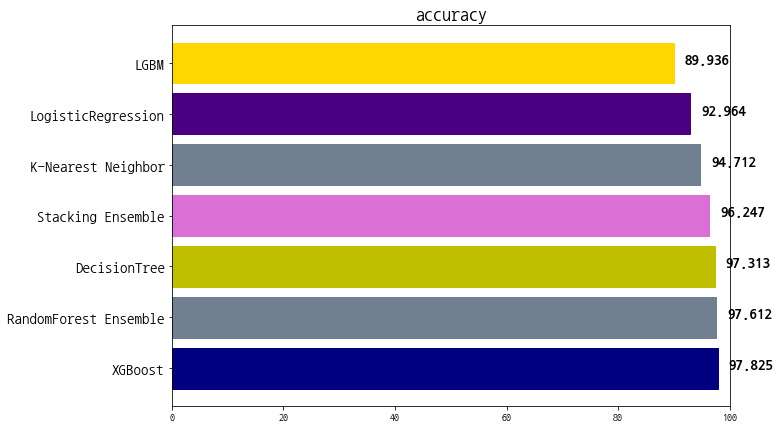

In [62]:
accuracy_eval('Stacking Ensemble', stacking_pred, y_test)

### 8) Weighted Blending

각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산
- 모델에 대한 가중치를 조절하여, 최종 output을 산출합니다.
- **가중치의 합은 1.0**이 되도록 합니다.

In [63]:
final_outputs = {
    'DecisionTree': dt_pred, 
    'randomforest': rfc_pred, 
    'xgb': xgb_pred, 
    'lgbm': lgbm_pred,
    'stacking': stacking_pred,
}

In [64]:
final_prediction=\
final_outputs['DecisionTree'] * 0.1\
+final_outputs['randomforest'] * 0.2\
+final_outputs['xgb'] * 0.25\
+final_outputs['lgbm'] * 0.15\
+final_outputs['stacking'] * 0.3\

In [65]:
# 가중치 계산값이 0.5 초과하면 1, 그렇지 않으면 0
final_prediction = np.where(final_prediction > 0.5, 1, 0)

                   model   accuracy
0                XGBoost  97.825160
1      Weighted Blending  97.697228
2  RandomForest Ensemble  97.611940
3           DecisionTree  97.313433
4      Stacking Ensemble  96.247335
5     K-Nearest Neighbor  94.712154
6     LogisticRegression  92.963753
7                   LGBM  89.936034


<Figure size 864x648 with 0 Axes>

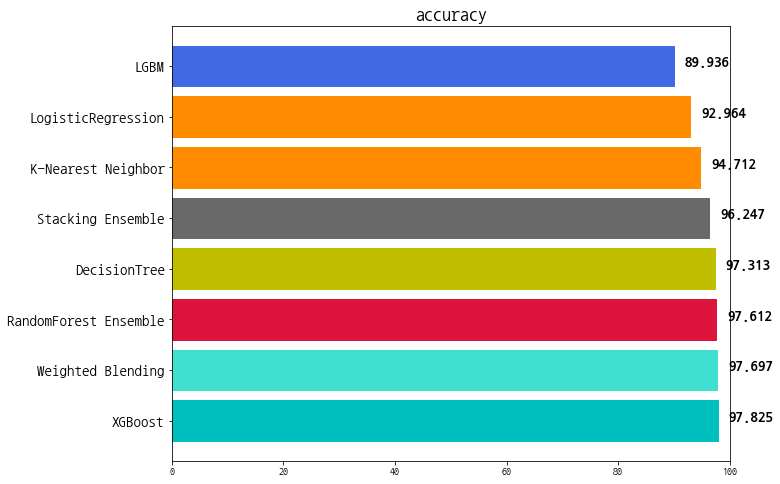

In [66]:
accuracy_eval('Weighted Blending', final_prediction, y_test)

## 배운 내용 정리
1. 머신러닝 모델 프로세스 <br>
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가
2. 평가 지표 활용 : 모델별 성능 확인을 위한 함수 (가져다 쓰면 된다)
3. 단일 회귀예측 모델 : LogisticRegression, KNN, DecisionTree
4. 앙상블 (Ensemble) : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending